# TIME SERIES ANALYSIS

# Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

## DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.


The data was organized  by Dr. Sina Kashuk at CUSP.
You can get it from the github repo (use the download link to download it live in your notebook). 
It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


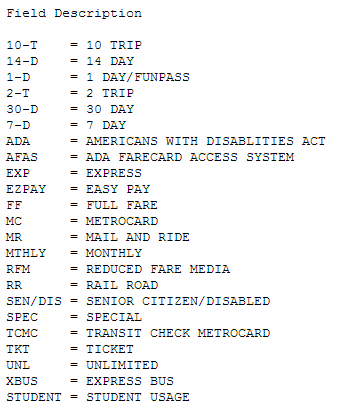

In [1]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

## Each time series (per station, per ticket type) contains the number of swipes per week for 194 weeks from 05/21/2010 to 02/21/2014. 

The data are available to you as a *python data cube*. you can load it as 

```
np.load(“MTA_Fare.npy")
```

and you will end up with a python numpy array of 
shape (600, 23, 194)




## Task 1: 
### Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
### Identify it, figure out the date (you know when the data starts and what the cadence is) and figure out what it is due to.


## Task 2: 
### Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


## Task 3:
### Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


## EXTRA CREDIT: Cluster. 
### Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
### Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

```
tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T
```

removing empty light curves

```
tots = tots[tots.std(1)>0]
```

with Kmeans you have to choose the number of clusters ahead km = 

```
KMeans(n_clusters=10)
```

and standardize the lightcurves before clustering. Notice: standardize, not whiten! If you have done clustering before you may have whitened the data: removed the variance by "column", here you want to remove the variance by "row". We will discuss this in the clustering lecture. 
```
vals = ((tots.T - tots.mean(1))/tots.std(1)).T
```

then you can run:

```
km.fit(vals)
```

# HINTS: 

## notes and hints: 

   1) you could coerce the data into a pandas dataframe, but the data is truly a "datacube": a 3D dataset, and flattening it into a pandas dataframe will make it far more difficult to manipulate. I strongly recommand you keep it as a numpy array
    
   2) note that the missing values are inputted as -1. if you want to do things like algebra (summing time series for example) you need to take care of that. If you replace the -1 entries with NaN, you may need to use functions that explicitly know how to deal with NaN: for example, to sum use the np.nansum etc
```
np.nanmean(mtarides)
np.nansum(mtarides)
```
as opposed to just 
```
np.mean(mtarides)
np.sum(mtarides)
```
 
## There are 600 stations, 23 card types. The trick to do this homework succesfully is to "collaps" (by averaging, or summing, depending on the question) the appropriate dimension in different parts of the homework: when you need to work at the station level (if I ask "which station is the one that..."), collaps the card type, when you need to work on the card type, collapse the stations. 

When I ask you "which station ...", you can sum or average over the ridership types for all station and reduce your data by a factor 23. When I ask you "which rideship type ..." you can sum or average over the stations and reduce your data by a factor 600! (or even better you could take a weighted average - *np.average(....weight=...)* -. The sum and average functions take an *axis* argument, which allows you to control which axis of the cube gets averaged. The dimension of the resulting object will allow you to check that you averaged over the right axis.


# Possibly useful functions

You are already familiar with and have already used  most of the functions I needed to perform this exercise. Here are some reminders and on few functions and methods that you may not have encountered yet which may be useful. You do not have to use them: there are many ways to do things and you do not have to solve this problem like I did, but here they are in case you need some help:

* the numpy function np.where() returns the index where a condition is true. It is slow and inefficient but very intuitive and convenient


* the nupy functions np.nansum(), np.sum(), np.nanmean() etc take an array and the axis along which to sum as inputs. If you want to sum over stations, or over rides, you can use these passing the appropriate axis number: axis=1 axis=2...


* to find periodicity you can use fourier transforms. Look at the notebook on fourier transforms in https://github.com/fedhere/UInotebooks/tree/master/timeseries. If you choose to use the numpy package you may want to use the real fft function:  np.fft.rfft()  

```
np.fft.rfft(mydata) 
```  

      will return the *real* part of the fourier transform (the fourier transform is a *complex* object, and therefore it has a real and an *imaginary* component - that is just math; all you need to know is that you need the real part). But what you want is its absolute value: np.abs(). 
      To plot the fourier transform you may want the x-axis to be in frequency. To get the x-axis of your plot in frequency (1/week since the data is in weeks) you can use the function 

```
np.fft.rfftfreq(N, d) 
```     
     which takes as arguments N = the length of your time series (the number of datapoints) and d: the *sample spacing*, or 1.0/sampling_rate (in this case, with 1/week sampling, if you want the freq in units of week that is just 1!)


*  the array methods 
```
np.array.flatten()
np.array.reshape()
```
     allow you to manipulate the shape of an array, for example if you want to run analysis on each individual time series, each station and each ridership type, which I recommand if you want to work on clustering for extra credit (resulting into 600*23=13800 time series) you can flatten the array as
     
```
mtaarray.flatten()
```

    which returns the flatten array:

```
mtaRides = np.load("MTA_Fare.npy")

mtaRides.shape
Out[10]: (600, 23, 194)

mtaRides.flatten().shape
Out[11]: (2677200,)
````

*  after you operate on the array to collapse an axis, always check the dimensionality to assure you have indeed collapsed the right axis! see cell below

```
import numpy as np
data = np.random.rand(100,10)

print(data.shape)
Out[12]: (100, 10)

print(data.mean())
Out[13]:  0.4902457782

print(data.mean(axis=0).shape, data.mean(axis=1).shape)
Out[14]: (10,) (100,)

```

In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%pylab inline
plt.style.use('classic')
from IPython.core.display import Image, display
import matplotlib.ticker as ticker
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from scipy.spatial.distance import cdist, pdist

Populating the interactive namespace from numpy and matplotlib


## Task 1:

In [3]:
#after reading the datacube you should see:
mtaRides = np.load("MTA_Fare.npy")
mtaRides.shape


(600, 23, 194)

In [4]:
mtaRides[1][1]

array([503, 647, 665, 582, 545, 390, 467, 474, 525, 520, 501, 533, 491,
       464, 383, 550, 541, 509, 529, 505, 540, 530, 494, 517, 523, 339,
       553, 539, 472, 388, 242, 242, 534, 480, 430, 427, 537, 536, 539,
       402, 533, 554, 606, 489, 528, 621, 522, 479, 558, 588, 578, 549,
       415, 556, 556, 536, 595, 433, 524, 471, 498, 542, 533, 557, 522,
       512, 444, 583, 631, 535, 687, 593, 618, 639, 665, 563, 684, 486,
       623, 566, 529, 534, 385, 412, 505, 418, 496, 476, 553, 481, 363,
       455, 425, 460, 444, 331, 393, 423, 423, 385, 420, 469, 428, 420,
       378, 427, 411, 408, 444, 346,   0,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -

In [5]:
mtaRides = mtaRides.astype('float')
mtaRides[mtaRides==-1] = np.nan

In [6]:
mtaRides[1][1]

array([ 503.,  647.,  665.,  582.,  545.,  390.,  467.,  474.,  525.,
        520.,  501.,  533.,  491.,  464.,  383.,  550.,  541.,  509.,
        529.,  505.,  540.,  530.,  494.,  517.,  523.,  339.,  553.,
        539.,  472.,  388.,  242.,  242.,  534.,  480.,  430.,  427.,
        537.,  536.,  539.,  402.,  533.,  554.,  606.,  489.,  528.,
        621.,  522.,  479.,  558.,  588.,  578.,  549.,  415.,  556.,
        556.,  536.,  595.,  433.,  524.,  471.,  498.,  542.,  533.,
        557.,  522.,  512.,  444.,  583.,  631.,  535.,  687.,  593.,
        618.,  639.,  665.,  563.,  684.,  486.,  623.,  566.,  529.,
        534.,  385.,  412.,  505.,  418.,  496.,  476.,  553.,  481.,
        363.,  455.,  425.,  460.,  444.,  331.,  393.,  423.,  423.,
        385.,  420.,  469.,  428.,  420.,  378.,  427.,  411.,  408.,
        444.,  346.,    0.,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,

In [7]:
cardW = np.nansum(np.nansum(mtaRides,axis=0),axis=0)

In [8]:
mtaRidesW = pd.DataFrame(cardW,columns = ['Rides'])

In [9]:
mtaRidesW.head()

Rides
0  26720267.0
1  29265971.0
2  29601189.0
3  29387592.0
4  29185768.0

In [10]:
mtaRidesW.shape

(194, 1)

In [11]:
pd.date_range('05/21/2010','02/01/2014',freq='W-FRI').shape

(194,)

In [12]:
mtaRidesW.index = pd.date_range('05/21/2010','02/01/2014',freq='W-FRI')
mtaRidesW.head()

Rides
2010-05-21  26720267.0
2010-05-28  29265971.0
2010-06-04  29601189.0
2010-06-11  29387592.0
2010-06-18  29185768.0

In [13]:
print ("mean Rides by week {:.2f}".format(mtaRidesW.Rides.mean()))
print ("stdev Rides by week {:.2f}".format(mtaRidesW.Rides.std()))
thresholds = [mtaRidesW.Rides.mean() + 3 * mtaRidesW.Rides.std(), 
              mtaRidesW.Rides.mean() - 3 * mtaRidesW.Rides.std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))

mean Rides by week 29781349.87
stdev Rides by week 2991680.90
3-sigma thresholds 38756392.58 20806307.17


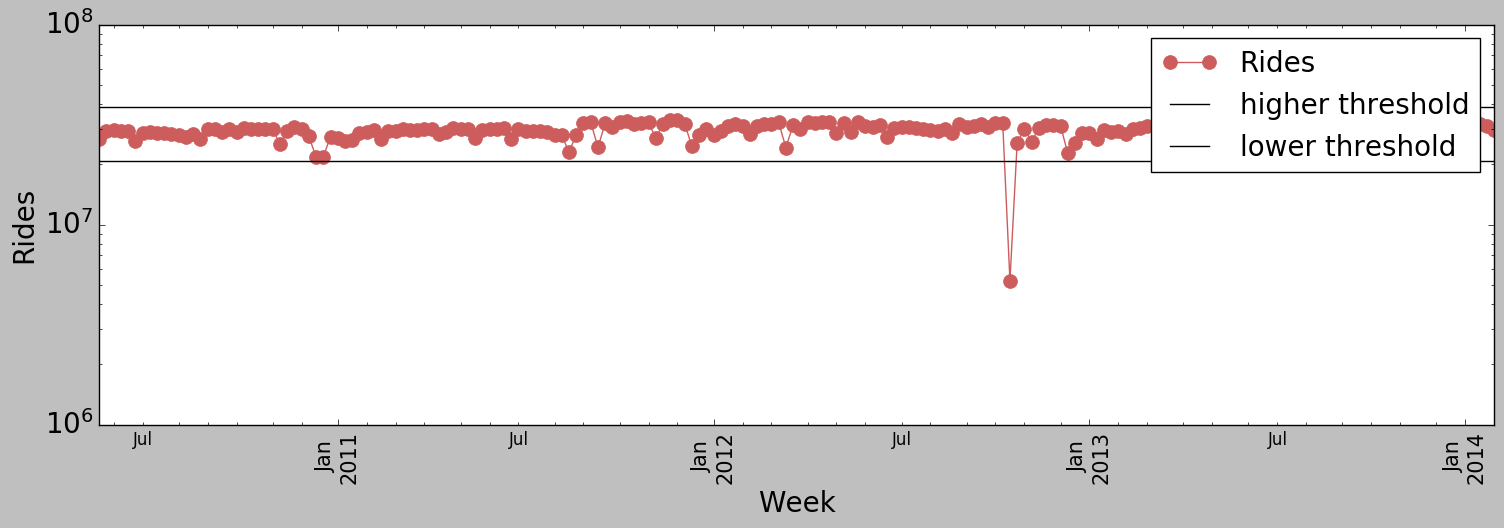

In [14]:
ax = mtaRidesW.plot(logy=True,figsize=(18,5), style=".-", ms=20, color="IndianRed")
pl.plot([plt.xlim()[0],plt.xlim()[1]],[thresholds[0],thresholds[0]],color='k',
        label='higher threshold')
pl.plot([plt.xlim()[0],plt.xlim()[1]],[thresholds[1],thresholds[1]],color='k',
        label='lower threshold')
pl.xticks(rotation=90, fontsize=15)
pl.yticks(fontsize=20)
pl.ylim(1e6, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("Rides", fontsize=20)
pl.xlabel("Week", fontsize=20);

## Figure 1: Distribution of MTA rides per week and its thresholds

In [15]:
mtaRidesW[mtaRidesW.Rides<thresholds[1]]

Rides
2012-10-19  5218686.0

## From the result I know the event was around 2012-10-19 then I checked the new. I find that New York was severely affected by Hurricane Sandy in 2012, particularly New York City, its suburbs, and Long Island. Sandy's impacts included the flooding of the New York City Subway system, of many suburban communities, and of all road tunnels entering. The MTA announced that all subway, bus and commuter rail  service would be suspended, beginning at 7 p.m. EDT on October 28 and expected to continue suspension through at least October. So the correct date should be pd.date_range('05/28/2010','02/08/2014',freq='W-FRI')

In [16]:
mtaRidesW.index = pd.date_range('05/28/2010','02/08/2014',freq='W-FRI')

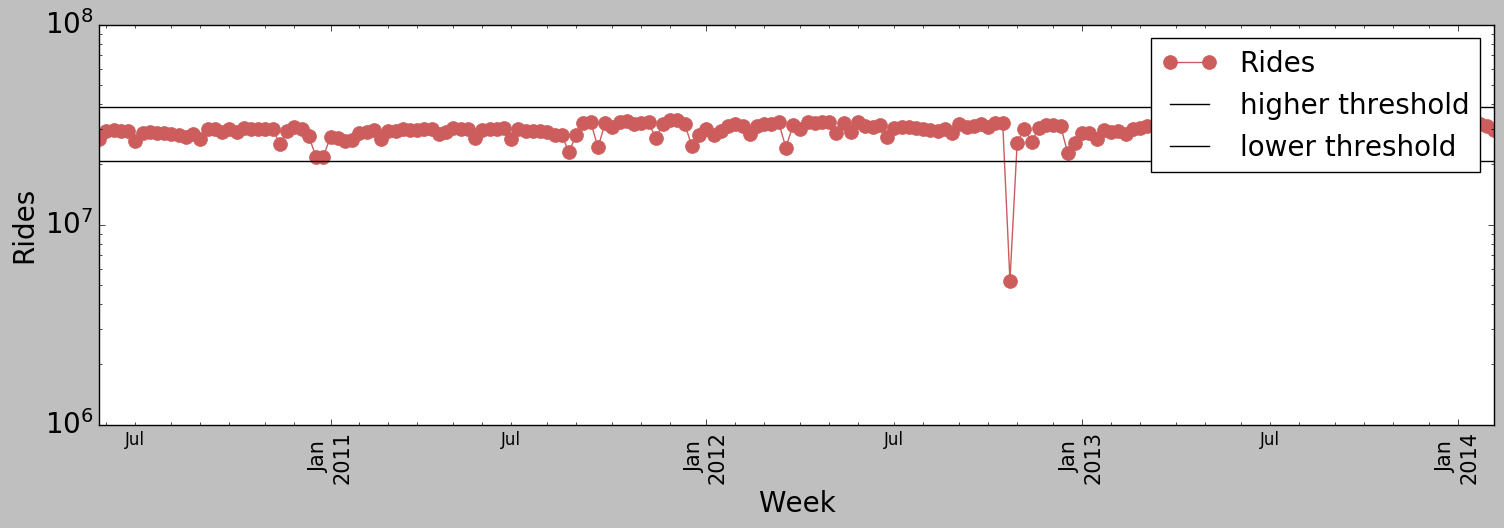

In [17]:
ax = mtaRidesW.plot(logy=True,figsize=(18,5), style=".-", ms=20, color="IndianRed")
pl.plot([plt.xlim()[0],plt.xlim()[1]],[thresholds[0],thresholds[0]],color='k',
        label='higher threshold')
pl.plot([plt.xlim()[0],plt.xlim()[1]],[thresholds[1],thresholds[1]],color='k',
        label='lower threshold')
pl.xticks(rotation=90, fontsize=15)
pl.yticks(fontsize=20)
pl.ylim(1e6, pl.ylim()[1])
pl.legend(fontsize=20)
pl.ylabel("Rides", fontsize=20)
pl.xlabel("Week", fontsize=20);

## Figure 2: Distribution of MTA rides per week(with correct week date) and its thresholds

## Task 2:

In [18]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [19]:
Type = pd.DataFrame(np.nansum(mtaRides, axis=0).T, columns=ridetype, index = pd.date_range('05/28/2010','02/08/2014',freq='W-FRI'))

In [20]:
Type.head()

10t       14d       1d        2t      30d         7d  \
2010-05-28  11494615.0  530524.0  47801.0  186551.0  46808.0  3697443.0   
2010-06-04  12526859.0  583533.0  51486.0  199229.0  64353.0  3981808.0   
2010-06-11  12766627.0  586194.0  51636.0  199668.0  56994.0  4033030.0   
2010-06-18  12653675.0  562602.0  52063.0  196389.0  37429.0  4032753.0   
2010-06-25  12809694.0  548858.0  51153.0  194883.0  35210.0  3925446.0   

                  ada     afas       exp        ez  ...      month       rfm  \
2010-05-28  8551937.0  10063.0  333197.0  512032.0  ...   123134.0  790110.0   
2010-06-04  9486394.0  11847.0  282755.0  578023.0  ...   151948.0  908068.0   
2010-06-11  9476538.0  12277.0  302028.0  615537.0  ...   151538.0  914124.0   
2010-06-18  9450081.0  11221.0  305513.0  606270.0  ...   147094.0  902549.0   
2010-06-25  9294002.0  10515.0  335780.0  563446.0  ...   137888.0  855573.0   

                 rr      sen   spec      tcmc        t   umlim   xbus  stud  
2010-05-28  59809.0  28221.0    0.0  124693.0  21060.0  6128.0  358.0   0.0  
2010-06-04  69209.0  32333.0    0.0  121713.0  21670.0  6120.0  474.0   0.0  
2010-06-11  69574.0  32618.0    0.0  122181.0  21433.0  6490.0  465.0   0.0  
2010-06-18  68099.0  32404.0    0.0  122051.0  21630.0  6590.0  484.0   0.0  
2010-06-25  66377.0  31933.0  176.0  119776.0  20297.0  6313.0  452.0   0.0  

[5 rows x 23 columns]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).std()


The ratio of the card type 10t is 0.9524522285780894
The ratio of the card type 14d is 0.7401229539211522
The ratio of the card type 1d is 0.8469007920665973
The ratio of the card type 2t is 1.0174632839559181
The ratio of the card type 30d is 0.8939789279827596
The ratio of the card type 7d is 0.6933913643249844
The ratio of the card type ada is 1.0674213230368326
The ratio of the card type afas is 4823.780269058297
The ratio of the card type exp is 94866.75574712643
The ratio of the card type ez is 511771.3025210084
The ratio of the card type ff is 1.1497487040452603
The ratio of the card type mc is 0.8000162850178698
The ratio of the card type mr is 3.142852465993354e-05
The ratio of the card type month is 1.6196332714302513
The ratio of the card type rfm is 1.512113866680655
The ratio of the card type rr is 0.38013949919156675
The ratio of the card type sen is 0.3513228152402375
The ratio of the card type spec is 0.18407216282140632
The ratio of the card type tcmc is 0.631541760566

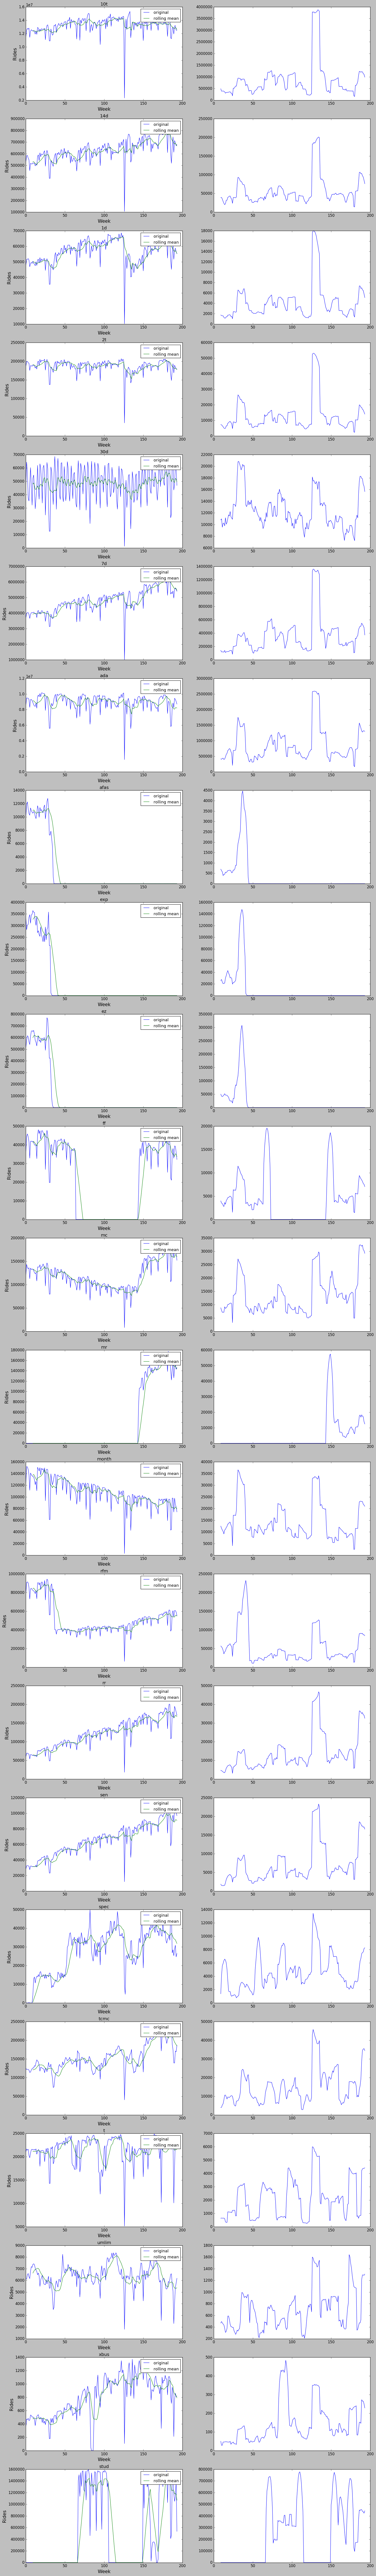

In [21]:
fig = pl.figure(figsize=(20,150))
ratio = []
for n,i in enumerate(ridetype):
    ax = fig.add_subplot(24,2,n+n+1)
    realdgp_rmean = pd.rolling_mean(Type[i], 10)
    ax.plot(np.arange(len(Type[i])), Type[i], label="original")
    ax.plot(np.arange(len(Type[i])), realdgp_rmean, label="rolling mean")
    ax.set_title("{}".format(i))
    pl.ylabel("Rides", fontsize=15)
    pl.xlabel("Week", fontsize=15)
    pl.legend(fontsize=13)
    ratio.append(pd.rolling_mean(Type[i], 10).dropna().head(10).sum() / pd.rolling_mean(Type[i], 10).dropna().tail(10).sum())
    
    ax = fig.add_subplot(24,2,n+n+2)
    realdgp_rvariance = pd.rolling_std(Type[i], 10)
    ax.plot(np.arange(len(Type[i])),realdgp_rvariance,label='standard deviation')
    print("The ratio of the card type {} is {}".format(i,ratio[n]))

## Type rr and sen have the steadily increase trend, with the ratio of 0.38 and 0.35.
## Type month has the steadily increase tread with the 

## Task 3:

In [22]:
card = pd.DataFrame(np.nansum(mtaRides,axis=1).T, index = pd.date_range('05/28/2010','02/08/2014',freq='W-FRI'))

In [23]:
card.head()

0        1       2        3        4        5        6    \
2010-05-28  126878.0  37306.0  6606.0  16378.0  18564.0  19987.0  12449.0   
2010-06-04  149477.0  46464.0  6881.0  17408.0  19903.0  20625.0  13644.0   
2010-06-11  152383.0  49359.0  7229.0  17595.0  19948.0  21225.0  13719.0   
2010-06-18  160175.0  44849.0  5731.0  14242.0  16076.0  17412.0  11460.0   
2010-06-25  162641.0  41509.0  7032.0  17589.0  20283.0  20909.0  14094.0   

                7        8         9   ...   590  591  592  593  594  595  \
2010-05-28  11091.0  10482.0  147187.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-04  11659.0  11030.0  154826.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-11  12037.0  10881.0  155958.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-18   9809.0   9123.0  154914.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   
2010-06-25  11944.0  10923.0  157628.0 ...   0.0  0.0  0.0  0.0  0.0  0.0   

            596  597  598  599  
2010-05-28  0.0  0.0  0.0  0.0  
2010-06-04  0.0  0.0  0.0  0.0  
2010-06-11  0.0  0.0  0.0  0.0  
2010-06-18  0.0  0.0  0.0  0.0  
2010-06-25  0.0  0.0  0.0  0.0  

[5 rows x 600 columns]

Text(0.5,1,'')

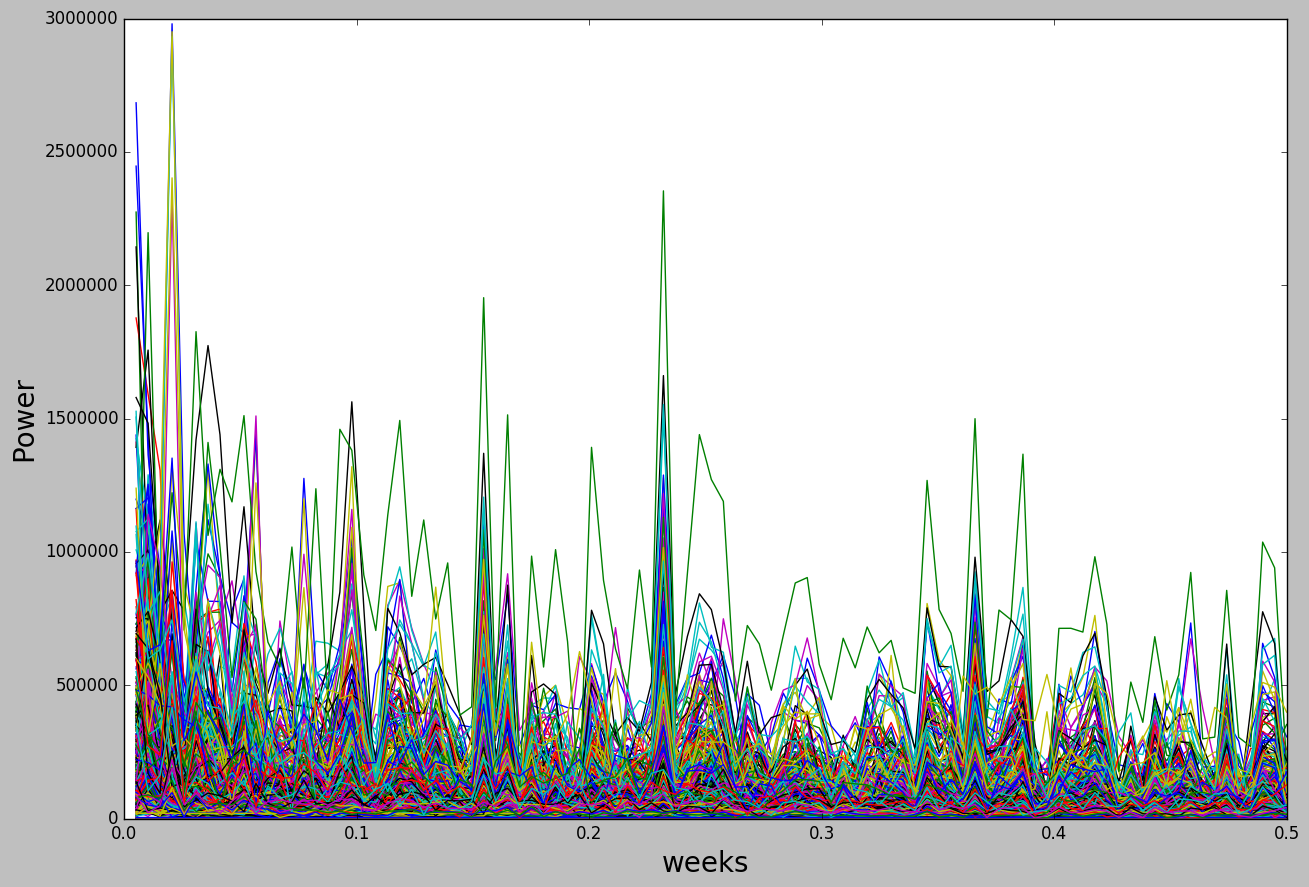

In [24]:
fig=pl.figure(figsize=(15,10))
ax=fig.add_subplot(111)
N = len(card)
for i in card.keys():
    f = np.abs(np.fft.rfft(card[i]))
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
pl.xlabel("weeks", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("", fontsize=20)


## Figure 3: Frequency of card swipes of 600 stations

In [25]:
len(card)

194

Text(0.5,1,'')

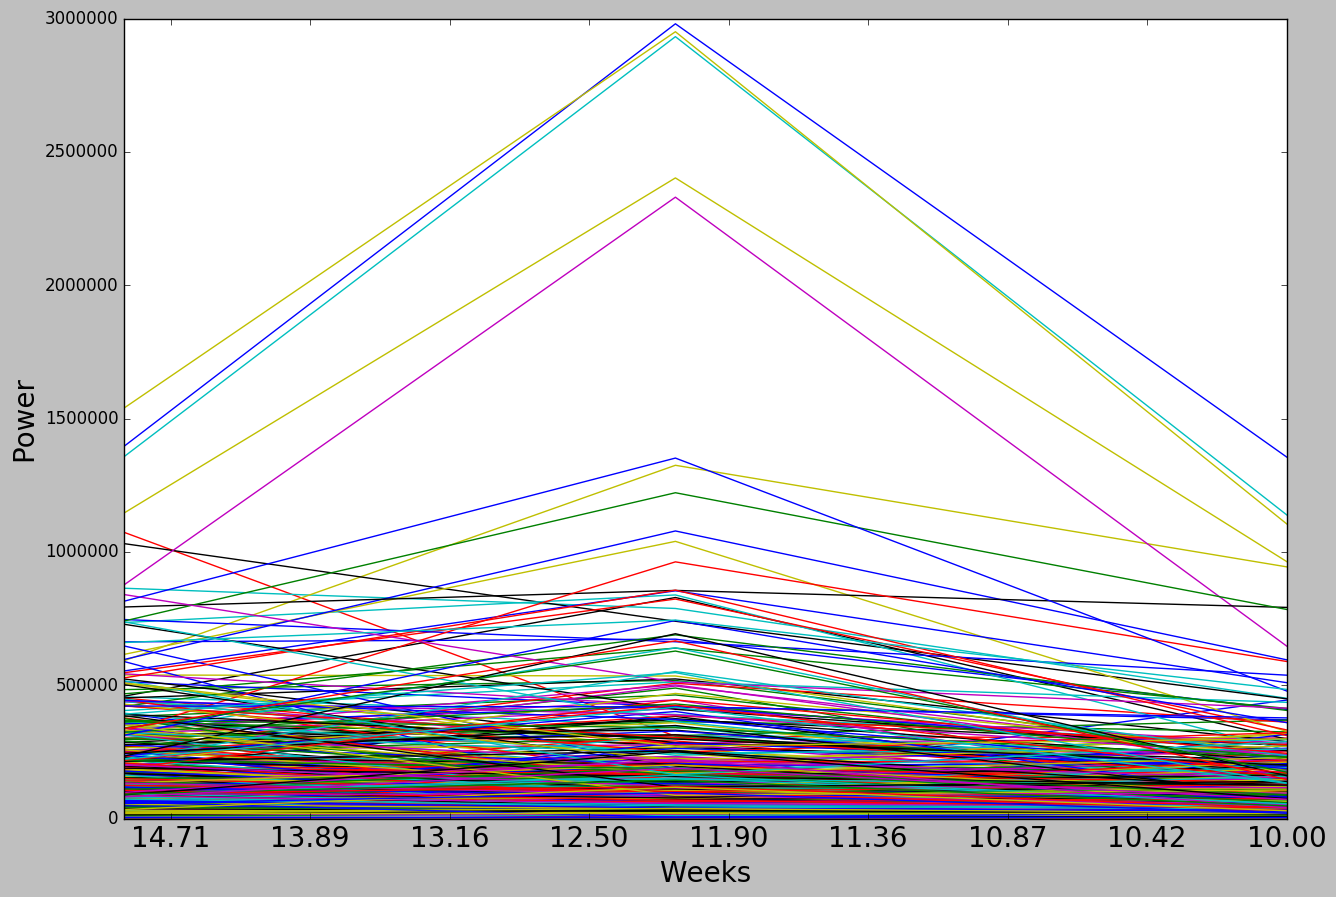

In [26]:
fig=pl.figure(figsize=(15,10))
ax=fig.add_subplot(111)
for i in card.keys():
    f = np.abs(np.fft.rfft(card[i]))
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
ax.set_xlim(1./60, 1./40)
ax.set_xticklabels([ "%.2f"%(1/4./f) for f in ax.get_xticks()], fontsize=20)
pl.xlabel("Weeks", fontsize=20)
pl.ylabel("Power", fontsize=20)
pl.title("", fontsize=20)

## Figure 4: Detect the top 4 stations

In [27]:
maxpoint = []
for i in card.keys():
    f = np.abs(np.fft.rfft(card[i]))
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    if f[4] > 2.40e6:
        maxpoint.append(i)

In [28]:
maxpoint

[0, 150, 194, 327]

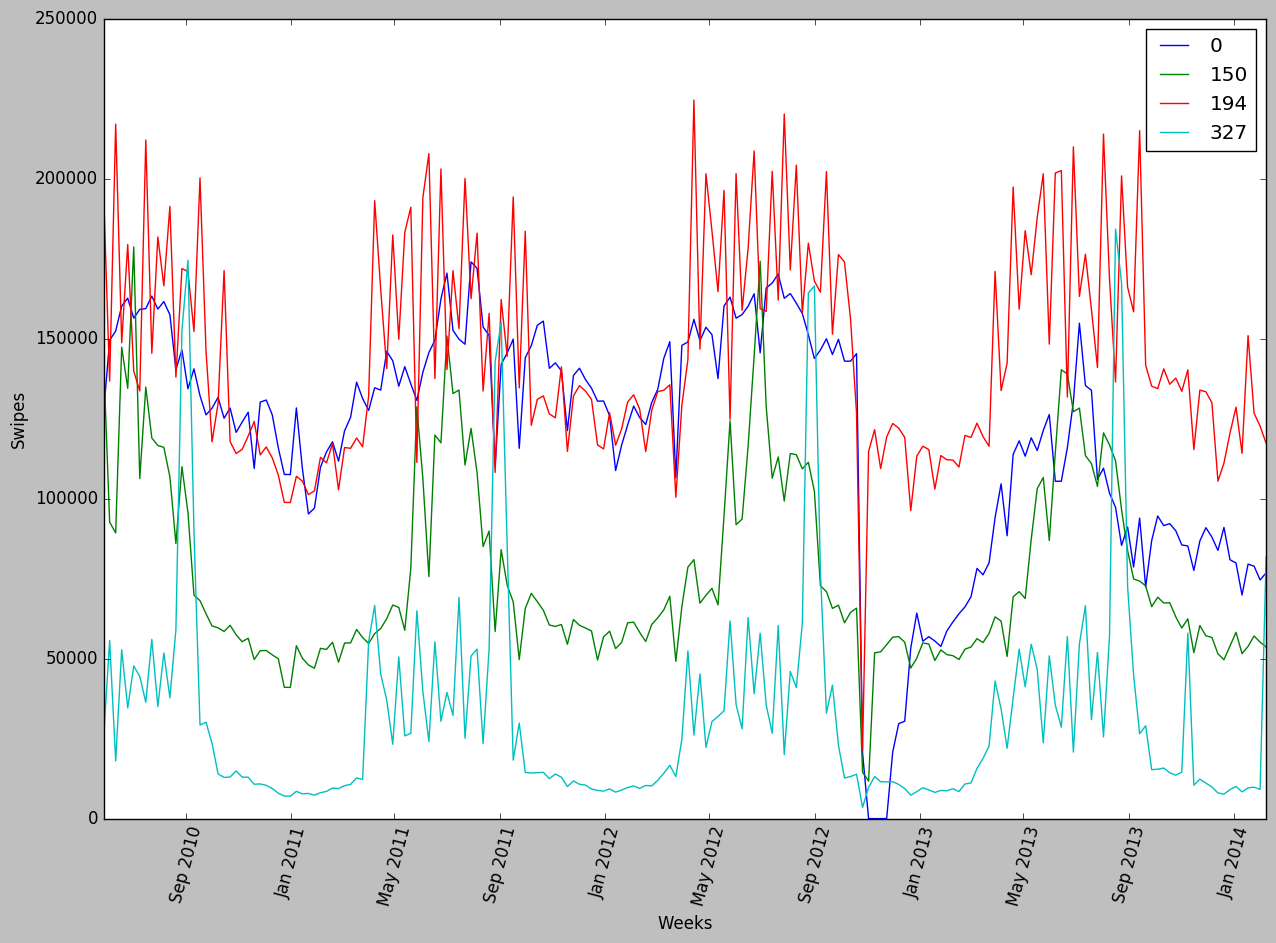

In [29]:
fig=pl.figure(figsize=(15,10))
ax=fig.add_subplot(111)
for i in maxpoint:
    pl.plot(pd.date_range('05/28/2010','02/08/2014',freq='W-FRI'),card[i],label=i)
pl.xticks(rotation=75)
pl.xlabel('Weeks')
pl.ylabel('Swipes')
pl.legend()

## Figure 5: The periodicity of Four stations (0, 150, 194, 327)

## EXTRA CREDIT: Cluster

In [30]:
tots = mtaRides.transpose(2,0,1).reshape(mtaRides.shape[2], mtaRides.shape[1]*mtaRides.shape[0]).T

In [31]:
tots = tots[tots.std(1)>0]

In [32]:
tots.shape

(7660, 194)

In [33]:
vals = ((tots.T - tots.mean(1))/tots.std(1))

In [34]:
vals.shape

(194, 7660)

In [35]:
km = KMeans(n_clusters=10)
label = km.fit_predict(vals)
label

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 8, 1, 1, 1,
       8, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 8, 1, 1, 1, 1, 1, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 4, 4, 8, 4, 4, 4, 4, 8, 8, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2,
       2, 8, 8, 2, 2, 7, 2, 2, 2, 2], dtype=int32)

In [36]:
label.shape

(194,)

In [37]:
Cluster = pd.DataFrame(label,
                       index=pd.date_range('05/28/2010','02/08/2014',freq='W-FRI'),
                       columns = ['cluster'])

In [38]:
Cluster.head(50)

cluster
2010-05-28        3
2010-06-04        3
2010-06-11        3
2010-06-18        3
2010-06-25        3
2010-07-02        3
2010-07-09        3
2010-07-16        3
2010-07-23        3
2010-07-30        3
2010-08-06        3
2010-08-13        3
2010-08-20        3
2010-08-27        3
2010-09-03        3
2010-09-10        3
2010-09-17        3
2010-09-24        3
2010-10-01        3
2010-10-08        3
2010-10-15        3
2010-10-22        3
2010-10-29        3
2010-11-05        3
2010-11-12        3
2010-11-19        3
2010-11-26        3
2010-12-03        3
2010-12-10        3
2010-12-17        3
2010-12-24        0
2010-12-31        0
2011-01-07        0
2011-01-14        0
2011-01-21        0
2011-01-28        0
2011-02-04        6
2011-02-11        6
2011-02-18        6
2011-02-25        6
2011-03-04        6
2011-03-11        6
2011-03-18        6
2011-03-25        6
2011-04-01        6
2011-04-08        6
2011-04-15        6
2011-04-22        6
2011-04-29        6
2011-05-06        6

Grade: 10/10